In [5]:
import numpy as np
import pymultifracs
import matplotlib.pyplot as plt

In [3]:
# %pip install git+https://github.com/neurospin/pymultifracs

  Cloning https://github.com/neurospin/pymultifracs to c:\users\aejog\appdata\local\temp\pip-req-build-urql42vq
  Resolved https://github.com/neurospin/pymultifracs to commit c58aef9f1ac32a5256f83b4288ac5039397316c6
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/neurospin/pymultifracs 'C:\Users\aejog\AppData\Local\Temp\pip-req-build-urql42vq'


Test simul

In [6]:
import pymultifracs.bootstrap

AttributeError: module 'pymultifracs' has no attribute 'simul'

In [46]:
ecgs_labels = np.load("ecgs_labels.npy")

X = ecgs_labels[:,:-1], ecgs_labels[:,-1]

In [47]:
rand_ind = np.random.randint(ecgs_labels.shape[0])

In [48]:
X =ecgs_labels[rand_ind,:-1]

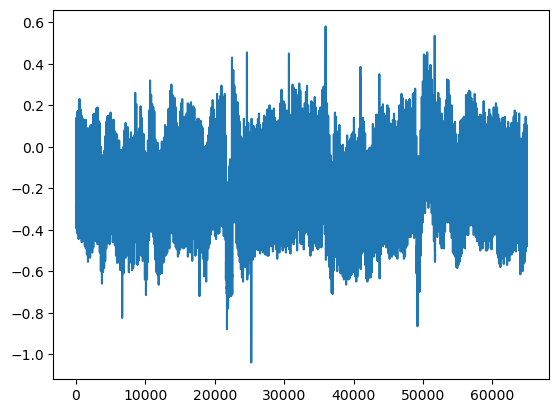

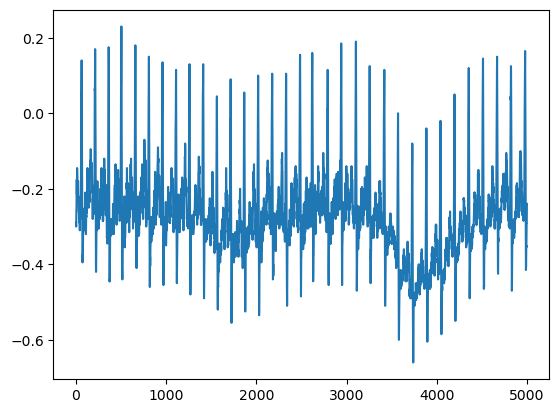

In [49]:
plt.plot(X)
plt.show()
plt.plot(X[:5000])

In [50]:
import pymultifracs.psd as psd

fs  = 1

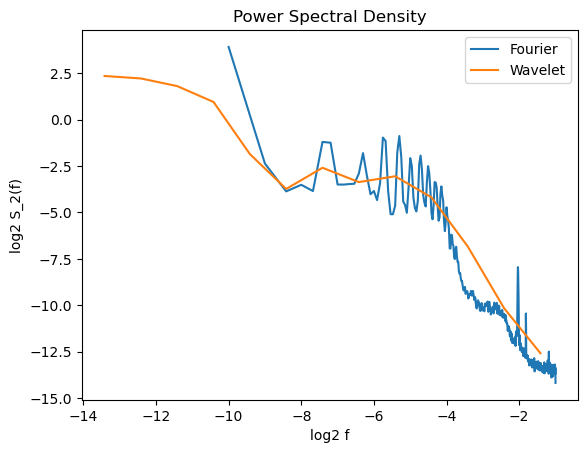

In [51]:
psd.plot_psd(X, fs, n_fft=1024)

In [52]:
import pymultifracs.mfa as mfa
from pymultifracs.utils import build_q_log

j1 = 1
j2 = 12



dwt, lwt = mfa.mf_analysis_full(
        X,
        scaling_ranges=[(j1, j2)],
        q=build_q_log(1, 10, 20),
        n_cumul=2,
        p_exp=np.inf,
        gamint=0.0
    )
sf, cumul, mfs, hmin = lwt



In [53]:
mfs.hq.shape

(43, 1, 1)

In [ ]:
degree_of_multifractality = np.max(mfs.hq) - np.min(mfs.hq)
degree_of_multifractality

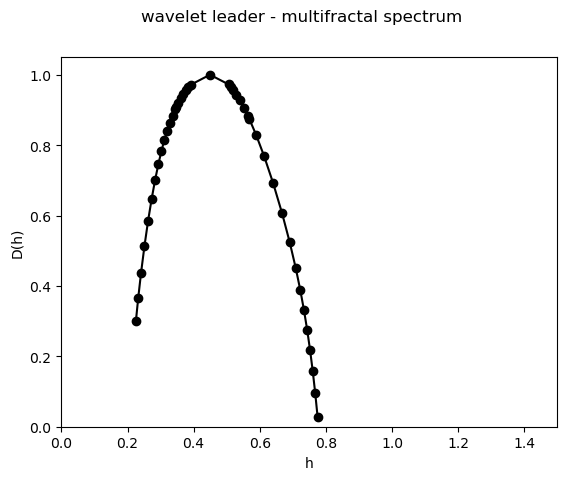

In [54]:
mfs.plot()

In [59]:
sf.q

array([-10.        ,  -8.8586679 ,  -7.8475997 ,  -6.95192796,
        -6.15848211,  -5.45559478,  -4.83293024,  -4.2813324 ,
        -3.79269019,  -3.35981829,  -2.97635144,  -2.6366509 ,
        -2.33572147,  -2.06913808,  -2.        ,  -1.83298071,
        -1.62377674,  -1.43844989,  -1.27427499,  -1.12883789,
        -1.        ,   0.        ,   1.        ,   1.12883789,
         1.27427499,   1.43844989,   1.62377674,   1.83298071,
         2.        ,   2.06913808,   2.33572147,   2.6366509 ,
         2.97635144,   3.35981829,   3.79269019,   4.2813324 ,
         4.83293024,   5.45559478,   6.15848211,   6.95192796,
         7.8475997 ,   8.8586679 ,  10.        ])

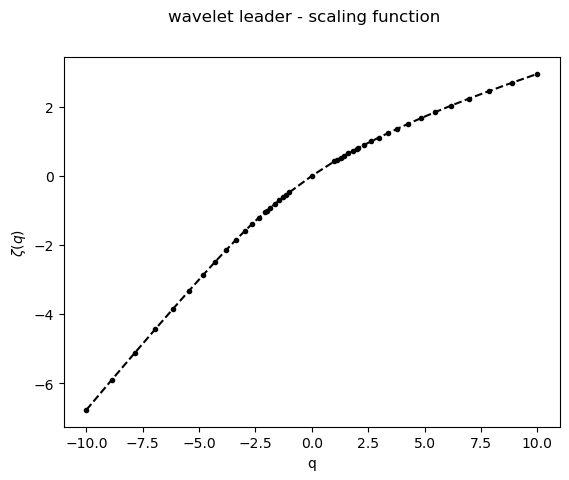

In [58]:
sf.plot_scaling()

In [61]:
from scipy.interpolate import interp1d

f = interp1d(sf.q, sf.zeta[:,0,0], kind='linear')
f(3)

array(1.11805289)

In [64]:
sf.zeta[:,0,0][32]

1.1106011942889453

In [ ]:
(x-axis) is the standard deviation of the interbeat intervals.

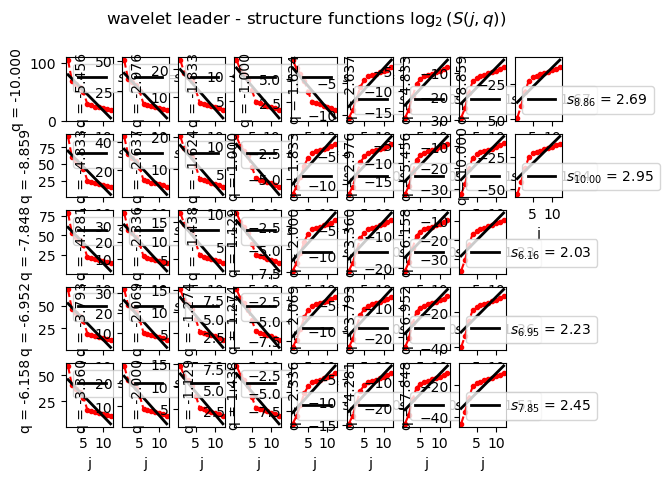

In [56]:
sf.plot(nrow=5)